# Lecture5　回帰分析1

## statsmodel
StatsModelsは、統計モデルを用いて推定や検定、探索ができるPythonライブラリです。

【簡単なstatsmodelによる統計解析の例】
https://www.statsmodels.org/stable/index.html

statsmodelの組み込みデータを使います。ここではAndre-Michel Guerry (1833) が集めた、1830年付近のパリの社会データ（犯罪、自殺、、、、）のデータ。


In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


86のフランス地方行政区(Department)毎の、
- Lottery: 一人当たりのロイヤル宝くじの掛け金
- Literacy: 識字率
- Pop1831: 人口(1831年調査)
が関係あるかを見ます。プロットしてみます

ここで　Lottery(一人当たりの掛け金)はLiteracy(識識字率)と人口とどう関係するか。

In [11]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.90e-08
Time:                        22:43:23   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [13]:
results.params

Intercept          246.434135
Literacy            -0.488923
np.log(Pop1831)    -31.311392
dtype: float64

まとめたもの

In [3]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.90e-08
Time:                        20:56:56   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

## 家計調査

In [8]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

url = 'https://sites.google.com/site/datasciencehiro/datasets/FamilyIncome.csv'
#url = 'datasets/FamilyIncome.csv'
df = pd.read_csv(url, comment='#')
FLAG_fig=True

print(df)

   income  expenditure  engel
0     216       172462   30.8
1     304       204599   29.9
2     356       224776   28.8
3     413       240153   27.8
4     481       255497   27.3
5     555       275490   25.9
6     642       295447   25.7
7     752       323072   24.7
8     902       362769   23.4
9    1461       467616   21.8


In [2]:
df

,income,expenditure,engel
0,216,172462,30.8
1,304,204599,29.9
2,356,224776,28.8
3,413,240153,27.8
4,481,255497,27.3
5,555,275490,25.9
6,642,295447,25.7
7,752,323072,24.7
8,902,362769,23.4
9,1461,467616,21.8


- ols(ordinary least squares、最小2乗)法を用いて単回帰モデルを求める。
- https://en.wikipedia.org/wiki/Ordinary_least_squares データ数 < 20 の場合には、尖度（kurtosis）の評価（olsではkurtosistestと表記）が有効にできないというwarningメッセージが現れるが、ここではこの評価は使わないので無視する。
- scipy.stats.kurtosistest https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kurtosistest.html
- Kurtosis: https://en.wikipedia.org/wiki/Kurtosis

In [5]:
result = smf.ols('expenditure ~ income', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     624.7
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           7.02e-09
Time:                        22:07:05   Log-Likelihood:                -105.43
No. Observations:                  10   AIC:                             214.9
Df Residuals:                       8   BIC:                             215.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.4e+05   6550.516     21.366      0.0

C:\Python38\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
result.params

Intercept    139956.859032
income          233.856036
dtype: float64

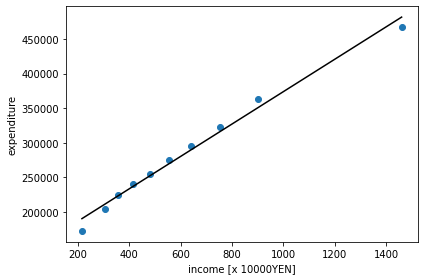

In [10]:
b0, b1 = result.params
plt.plot(df['income'],df['expenditure'], 'o')
plt.plot(df['income'], b0+b1*df['income'], c='k')

plt.xlabel('income [x 10000YEN]')
plt.ylabel('expenditure')

plt.tight_layout()
if FLAG_fig: plt.savefig('REG_Simple_FamilyIncome1.png')
#plt.show()

予測

In [16]:
NewData = {'income':[1100,1200]}
df_new = pd.DataFrame(NewData)
pred = result.predict(df_new)
pred

0    397198.498402
1    420584.101981
dtype: float64

In [18]:
df_new

,income
0,1100
1,1200


上のグラフを見ると，最低収入と最高収入のデータが最も外れているように見えるので，この2点をはずした回帰分析を再度行う。

In [19]:
df1=df.copy()
df1.drop(9, inplace=True)
df1.drop(0, inplace=True)

In [20]:
result = smf.ols('expenditure ~ income', data=df1).fit()
result.summary()

C:\Python38\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2889.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           2.78e-09
Time:                        05:33:30   Log-Likelihood:                -73.085
No. Observations:                   8   AIC:                             150.2
Df Residuals:                       6   BIC:                             150.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.314e+05   2784.282     47.195      0.000    1.25e+05    1.38e+05
income       256.6572      4.775     53.754      0.000     244.974     268.340
==============================================================================
Omnibus:                        3.508   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.091
Skew:                          -0.903   Prob(JB):                        0.580
Kurtosis:                       3.086   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

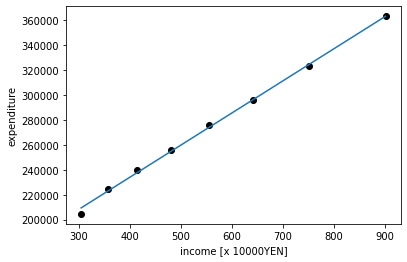

In [22]:
a, b = result.params
plt.plot(df1['income'],df1['expenditure'], 'o', c='k')
plt.plot(df1['income'], a+b*df1['income'])

plt.xlabel('income [x 10000YEN]')
plt.ylabel('expenditure')
plt.show()

## 多項式回帰分析
Rデータセットのcarsのデータを用いる。
carsの説明 : 次のサイトからcarsを検索  
https://stat.ethz.ch/R-manual/R-＃#devel/library/datasets/html/00Index.html <br>
このデータを予め取得して、下記のように置いた。<br>
これを読み込み、多項式回帰分析を説明する。<br>

本Notebookと類似のREG_Poly_R_cars.ipynbはRデータセットを読込むために、別途、必要なパッケージを予めインストールして、この上で、Rデータセットを読込む。このインストールを省くことを行ったのが本Notebookである。

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

FLAG_fig = True

In [2]:
url = "https://sites.google.com/site/datasciencehiro/datasets/cars_R_datasets.csv"
#url = "datasets/cars_R_datasets.csv"
df = pd.read_csv(url)  # read datasets of cars
x = df.speed
df.head()

,Unnamed: 0,speed,dist
0,0,4.0,2.0
1,1,4.0,10.0
2,2,7.0,4.0
3,3,7.0,22.0
4,4,8.0,16.0


#### 1次モデル
$y = b_0 + b_1 x$

In [3]:
result1 = smf.ols('dist ~ speed', data=df).fit()
print(result1.summary())
b0, b1 = result1.params

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           1.49e-12
Time:                        21:40:07   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0

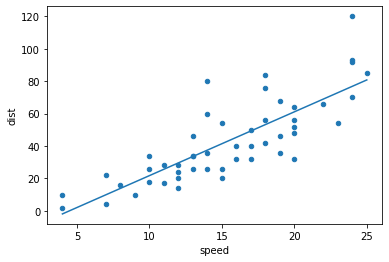

In [4]:
df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+b1*x)

if FLAG_fig: plt.savefig('fig_REG_poy_R_cars_01.png')

#### 2次モデル
$y = b_0 + b_1 x + b_2 x^2$

In [5]:
result2 = smf.ols('dist ~ np.power(speed,2) + speed', data=df).fit()
print(result2.summary())
b0, b2, b1 = result2.params

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     47.14
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           5.85e-12
Time:                        21:41:13   Log-Likelihood:                -205.39
No. Observations:                  50   AIC:                             416.8
Df Residuals:                      47   BIC:                             422.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4701     14

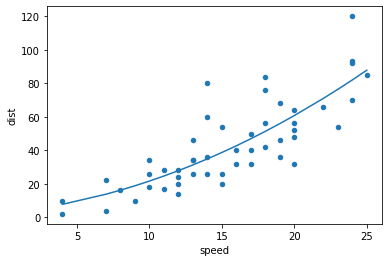

In [6]:
df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+b1*x+b2*(x**2))

if FLAG_fig: plt.savefig('fig_REG_poy_R_cars_02.png')

#### 3次モデル
$y = b_0 + b_1  + b_2 x^2 + b_3 x^3$

In [7]:
result3 = smf.ols('dist ~ np.power(speed,3) + np.power(speed,2) + speed', data=df).fit()
print(result3.summary())
b0, b3, b2, b1 = result3.params

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     31.58
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           3.07e-11
Time:                        21:42:36   Log-Likelihood:                -204.94
No. Observations:                  50   AIC:                             417.9
Df Residuals:                      46   BIC:                             425.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -19.5050     28

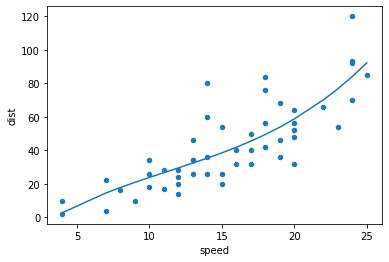

In [8]:
df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+b1*x+b2*(x**2) + b3*(x**3))

if FLAG_fig: plt.savefig('fig_REG_poy_R_cars_03.png')

## nupmy.polyfit（）を用いたカーブフィッティングの例

[0.0999593  0.91328761 2.47013779]
         2
0.09996 x + 0.9133 x + 2.47


Text(0.5, 1.0, 'degree = 2')

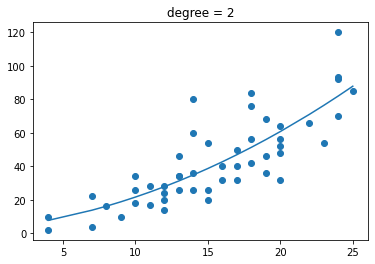

In [9]:
x = df.speed
y = df.dist
degree = 2
fit = np.polyfit(x, y, degree)
print(fit)
est = np.poly1d(fit)
print(est)
plt.scatter(x,y)
plt.plot(x,est(x))
plt.title('degree = %d' % degree)

[ 1.02520479e-02 -3.49657814e-01  6.80110597e+00 -1.95050491e+01]
         3          2
0.01025 x - 0.3497 x + 6.801 x - 19.51


Text(0.5, 1.0, 'degree = 3')

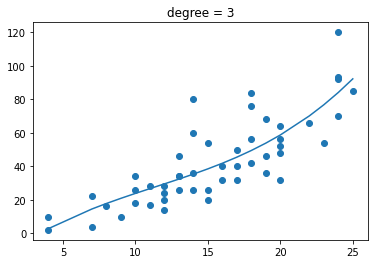

In [10]:
degree = 3
fit = np.polyfit(x, y, degree)
print(fit)
est = np.poly1d(fit)
print(est)
plt.scatter(x,y)
plt.plot(x,est(x))
plt.title('degree = %d' % degree)

overfittingの例

[-1.20583509e-06  1.58844338e-04 -9.04728719e-03  2.91745289e-01
 -5.85367394e+00  7.55386732e+01 -6.24503022e+02  3.17458505e+03
 -8.94788381e+03  1.05717941e+04]
            9             8            7          6         5         4
-1.206e-06 x + 0.0001588 x - 0.009047 x + 0.2917 x - 5.854 x + 75.54 x
          3        2
 - 624.5 x + 3175 x - 8948 x + 1.057e+04


Text(0.5, 1.0, 'degree = 9')

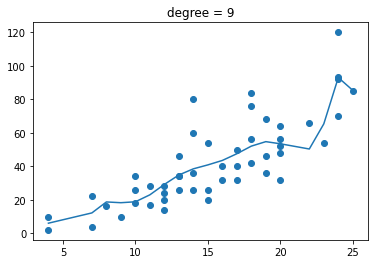

In [11]:
degree = 9
fit = np.polyfit(x, y, degree)
print(fit)
est = np.poly1d(fit)
print(est)
plt.scatter(x,y)
plt.plot(x,est(x))
plt.title('degree = %d' % degree)

## 赤ワインの品質を回帰分析する
データセットの説明　Wine Quality Data Set　（ UCI　Machine Learning Repository） http://archive.ics.uci.edu/ml/datasets/Wine+Quality
->DataFolder, "winequality-red.csv"  
このラベル名の空白をアンダーラインに変換して，これを“winequality-red_mod.csv”というファイル名で下記のクラウドにアップした

In [12]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
url='https://sites.google.com/site/datasciencehiro/datasets/winequality-red_mod.csv'
#url='datasets/winequality-red_mod.csv'
wine_set = pd.read_csv(url, sep=";")
wine_set.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
ols_model = "quality ~  volatile_acidity + chlorides + total_sulfur_dioxide + sulphates + alcohol"
results = smf.ols(formula = ols_model, data=wine_set).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     172.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          5.48e-147
Time:                        22:02:40   Log-Likelihood:                -1580.4
No. Observations:                1599   AIC:                             3173.
Df Residuals:                    1593   BIC:                             3205.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.0049      0.204     14.747      0.000       2.605       3.405
volatile_acidity        -1.1419      0.097    -11.779      0.000      -1.332      -0.952
chlorides               -1.7048      0.392     -4.352      0.000      -2.473      -0.937
total_sulfur_dioxide    -0.0023      0.001     -4.544      0.000      -0.003      -0.001
sulphates                0.9148      0.110      8.296      0.000       0.699       1.131
alcohol                  0.2771      0.016     16.811      0.000       0.245       0.309
==============================================================================
Omnibus:                       25.233   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.739
Skew:                          -0.153   Prob(JB):                     6.38e-09
Kurtosis:                       3.688   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""